# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import missingno as msno
import random
import json
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
intents = json.loads(open("/content/sample_data/HealthCare_intents.json").read())
intents

{'intents': [{'tag': 'Greetings',
   'patterns': ['Hello!',
    'Hi there!',
    'Good morning!',
    'Good afternoon!',
    'Good evening!',
    'Hey!',
    'What’s up?',
    'How are you?'],
   'responses': ['Hello! How can I assist you today?',
    'Hi there! What brings you here?',
    'Good day! How can I help you?',
    'Hey! How are you doing?',
    'Hello! Is there something specific you want to talk about?']},
  {'tag': 'Goodbyes',
   'patterns': ['Goodbye',
    'See you later',
    'Take care',
    'Have a great day',
    'Bye',
    'Talk to you later',
    'See you soon'],
   'responses': ['Goodbye! Take care and stay healthy!',
    'See you later! If you need anything, just ask!',
    "Have a great day! I'm here whenever you need help.",
    "Take care! Don't hesitate to come back if you have more questions.",
    'Bye! Wishing you a wonderful day ahead!']},
  {'tag': 'Thank You',
   'patterns': ['Thank you!',
    'Thanks!',
    'I appreciate it!',
    'Thanks for your help

In [3]:
def create_df():
    df=pd.DataFrame({'Pattern':[],'Tag':[]})
    return df

df=create_df()
df

,Pattern,Tag


In [4]:
def extract_json_info(json_file,df):
    for intent in json_file['intents']:
        for pattern in intent['patterns']:
            sentence_tag=[pattern,intent['tag']]
            df.loc[len(df.index)] = sentence_tag
    return df

df=extract_json_info(intents,df)
df

,Pattern,Tag
0,Hello!,Greetings
1,Hi there!,Greetings
2,Good morning!,Greetings
3,Good afternoon!,Greetings
4,Good evening!,Greetings
...,...,...
1193,"I’m feeling pressure in my lower abdomen, and ...",Respiratory Issues
1194,"I’ve been wheezing, and it feels like I can’t ...",Respiratory Issues
1195,"One side of my face feels numb, and I’ve been ...",Neurological Symptoms
1196,"My vision is blurry, and my arm feels weak all...",Neurological Symptoms


In [5]:
df2=df.copy()
df2

,Pattern,Tag
0,Hello!,Greetings
1,Hi there!,Greetings
2,Good morning!,Greetings
3,Good afternoon!,Greetings
4,Good evening!,Greetings
...,...,...
1193,"I’m feeling pressure in my lower abdomen, and ...",Respiratory Issues
1194,"I’ve been wheezing, and it feels like I can’t ...",Respiratory Issues
1195,"One side of my face feels numb, and I’ve been ...",Neurological Symptoms
1196,"My vision is blurry, and my arm feels weak all...",Neurological Symptoms


In [6]:
df.shape

(1198, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1198 entries, 0 to 1197
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pattern  1198 non-null   object
 1   Tag      1198 non-null   object
dtypes: object(2)
memory usage: 28.1+ KB


In [8]:
x=len(df['Tag'].unique())

print(f"{x} classes in Chatbot")

print(df['Tag'].unique())

162 classes in Chatbot
['Greetings' 'Goodbyes' 'Thank You' 'Small Talk' 'identity' 'creator'
 'greetings' 'Acne' 'Attention Deficit Disorder (ADHD)' 'Allergies'
 'Alzheimers' 'Ankylosing Spondylitis' 'Anorexia'
 'Anxiety or Panic Disorder' 'Arthritis' 'Antitrypsin Deficiency'
 'Abdominal Migraine' 'Amyloidosis' 'Abscessed Tooth' 'Amenorrhea'
 'Absence Seizure' 'Sleep Apnea' 'Achalasia' 'Appendicitis'
 'Aparaxia of Speech' 'Arachnoiditis'
 'Acute Respiratory Distress Syndrome (ARDS)' 'Anemia' 'Arrhythmia'
 'Asthma' 'Autism' 'Blepharitis' 'Bacterial Arthritis'
 'Bacterial Meningitis' 'Benign Prostate Enlargement(BPE)'
 'Bipolar Disorder' 'Bronchiectasis' 'Bronchitis' 'Bulimia' 'Catarrh'
 'Cellulitis' 'Chest Infection' 'Chest Pain' 'Chronic Fatigue Syndrome'
 'Common Cold' 'Conjunctivitis' 'Dehydration' 'Dental Abscess'
 'Depression' 'Diabetes' 'Diarrhoea' 'Dystonia' 'Epilepsy'
 'Escherichia Coli' 'Flu' 'Fetal alcohol spectrum disorder'
 'Food poisoning' 'Fungal nail infection' 'Gallbladd

# Visualizations

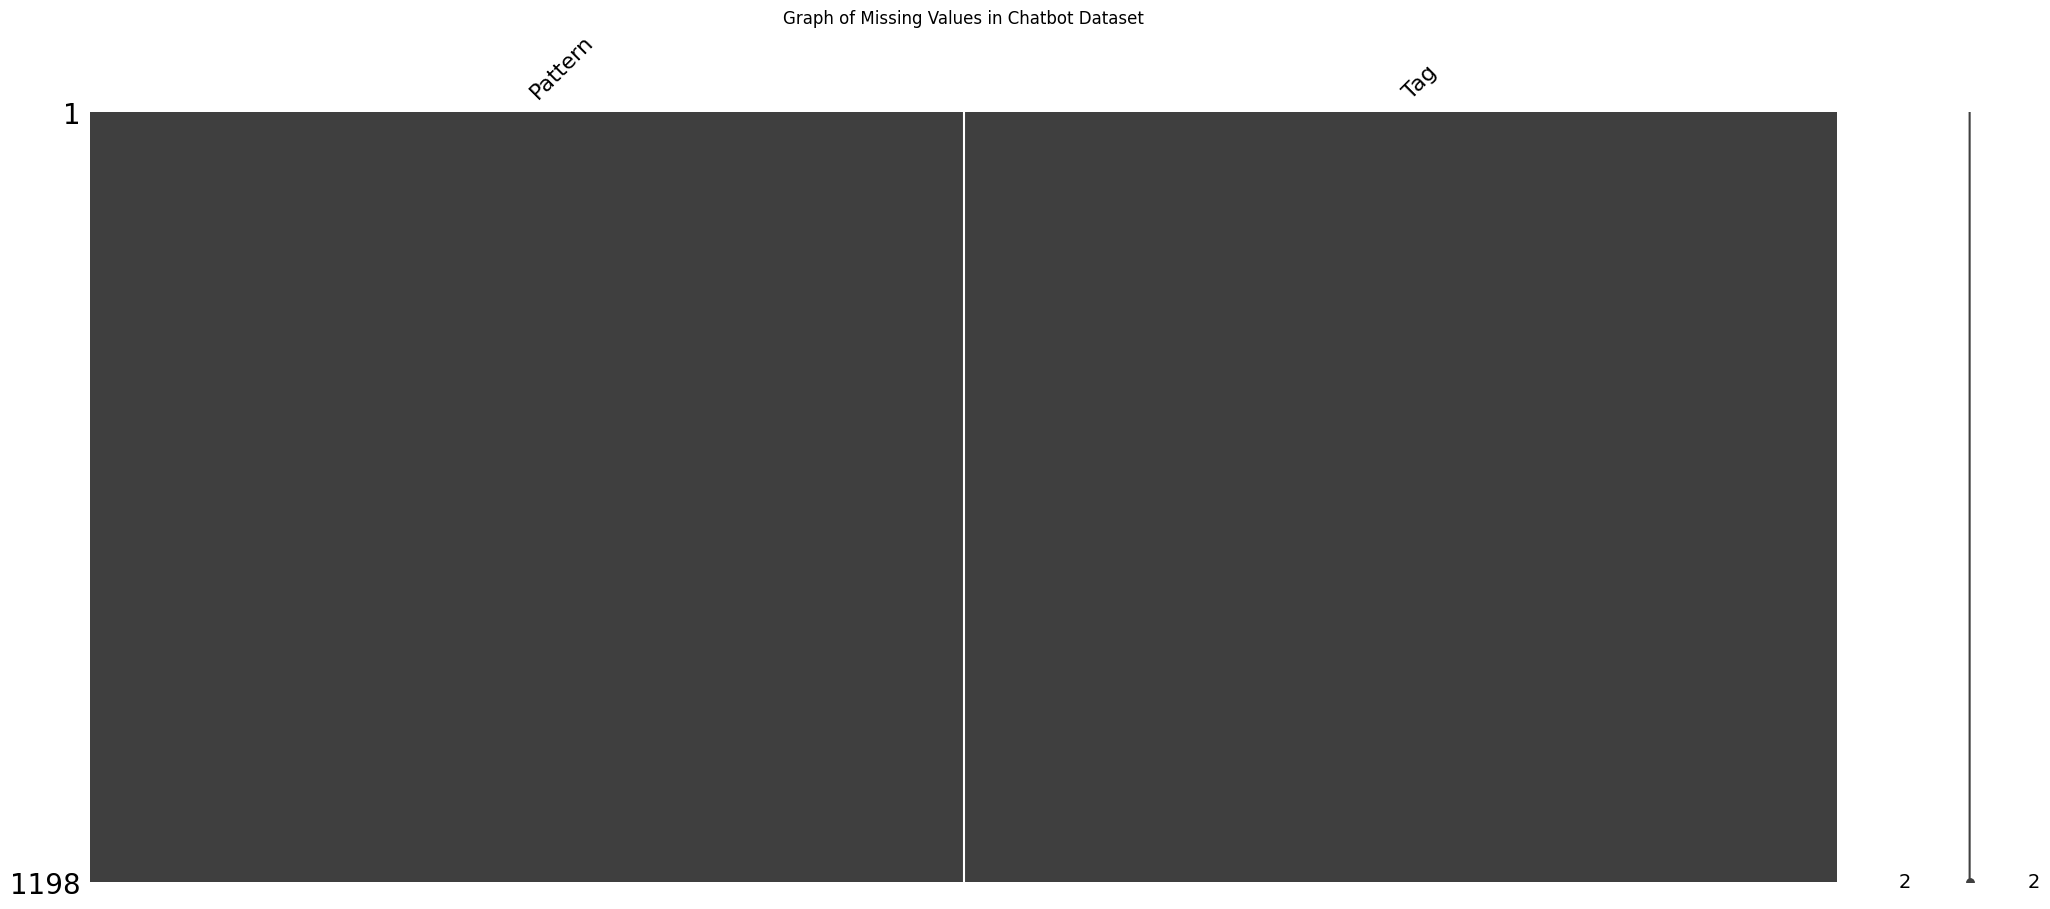

In [9]:
msno.matrix(df)

plt.title('Graph of Missing Values in Chatbot Dataset')
plt.show()

In [10]:
def count_plot(x, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):

    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)

    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=25)
    plt.ylabel(ylabel, fontsize=25)

    ax.yaxis.set_label_position('left')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]

    plt.show()

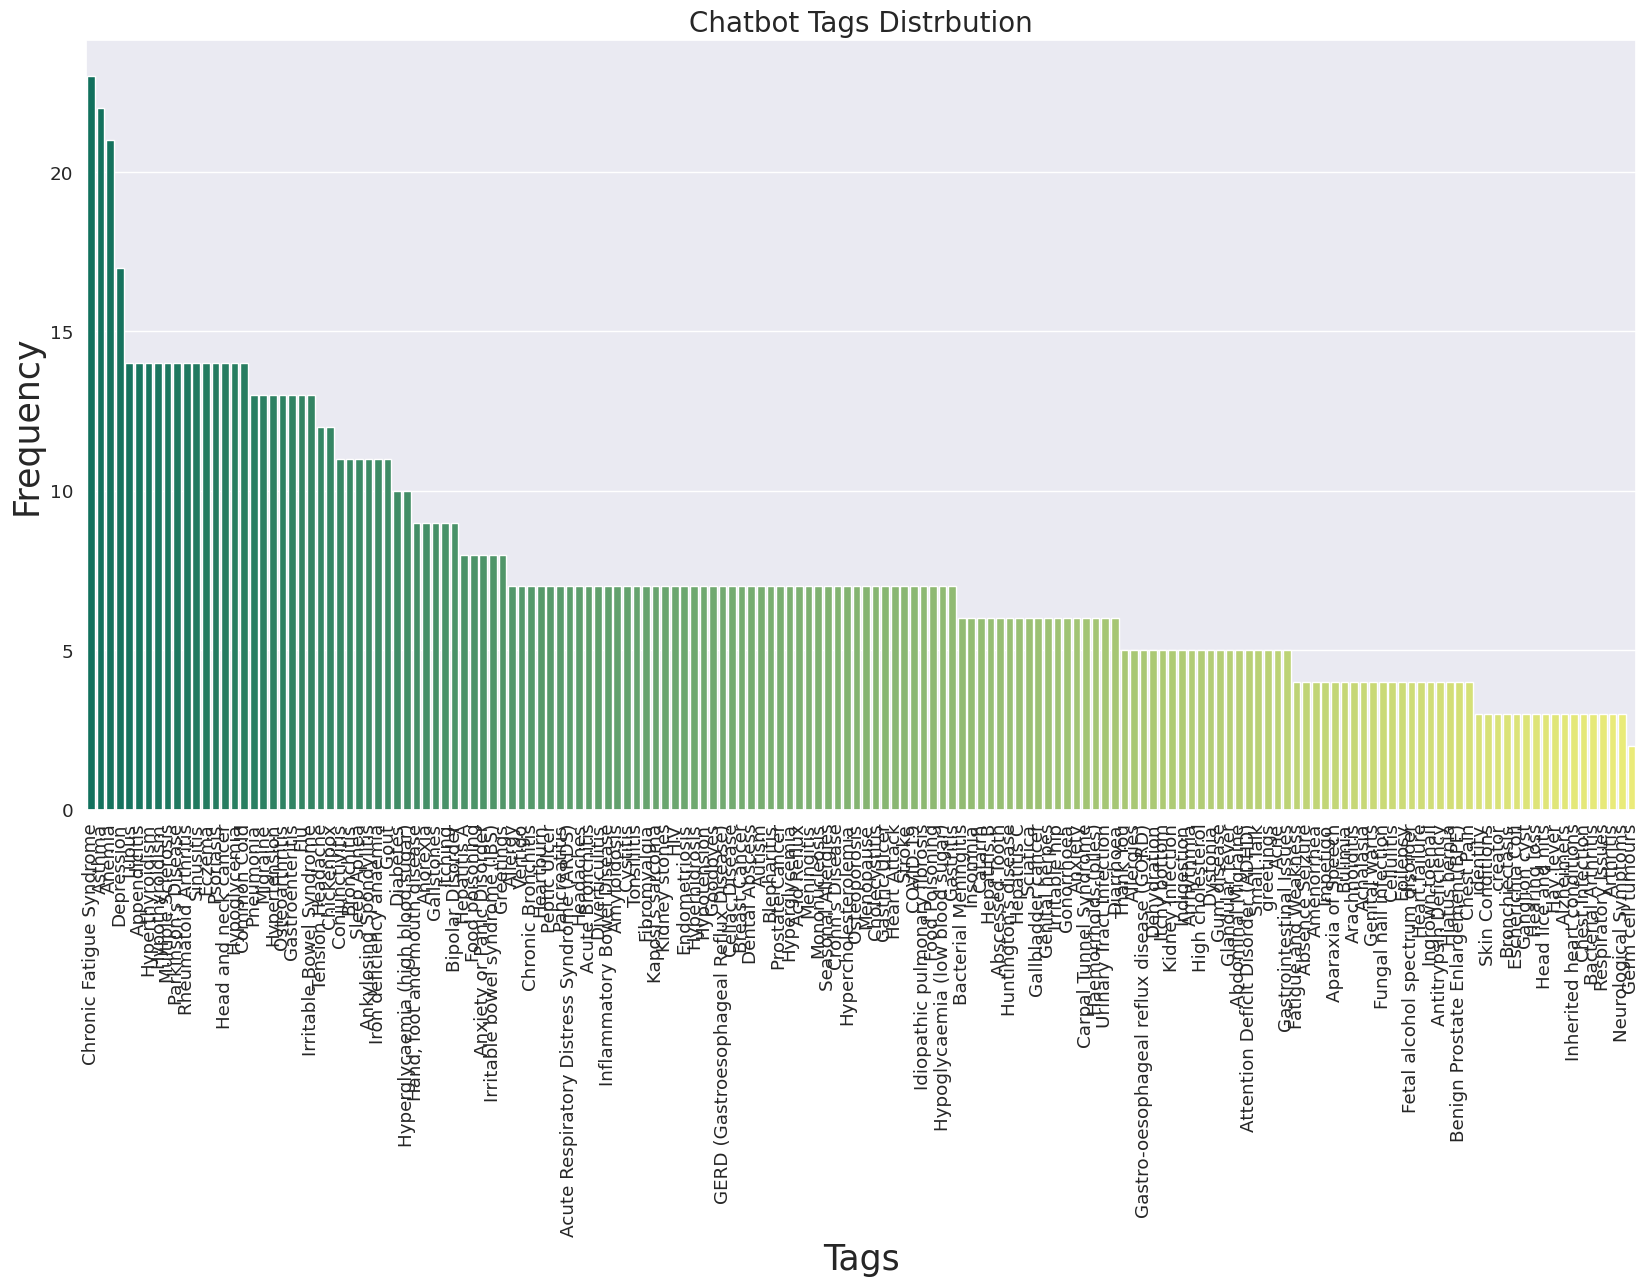

In [11]:
sns.set(font_scale = 1.2)
order = df['Tag'].value_counts().index
count_plot(df['Tag'], df, "Chatbot Tags Distrbution", "Tags", "Frequency", 20,10, order=order,rotation=True, palette="summer")

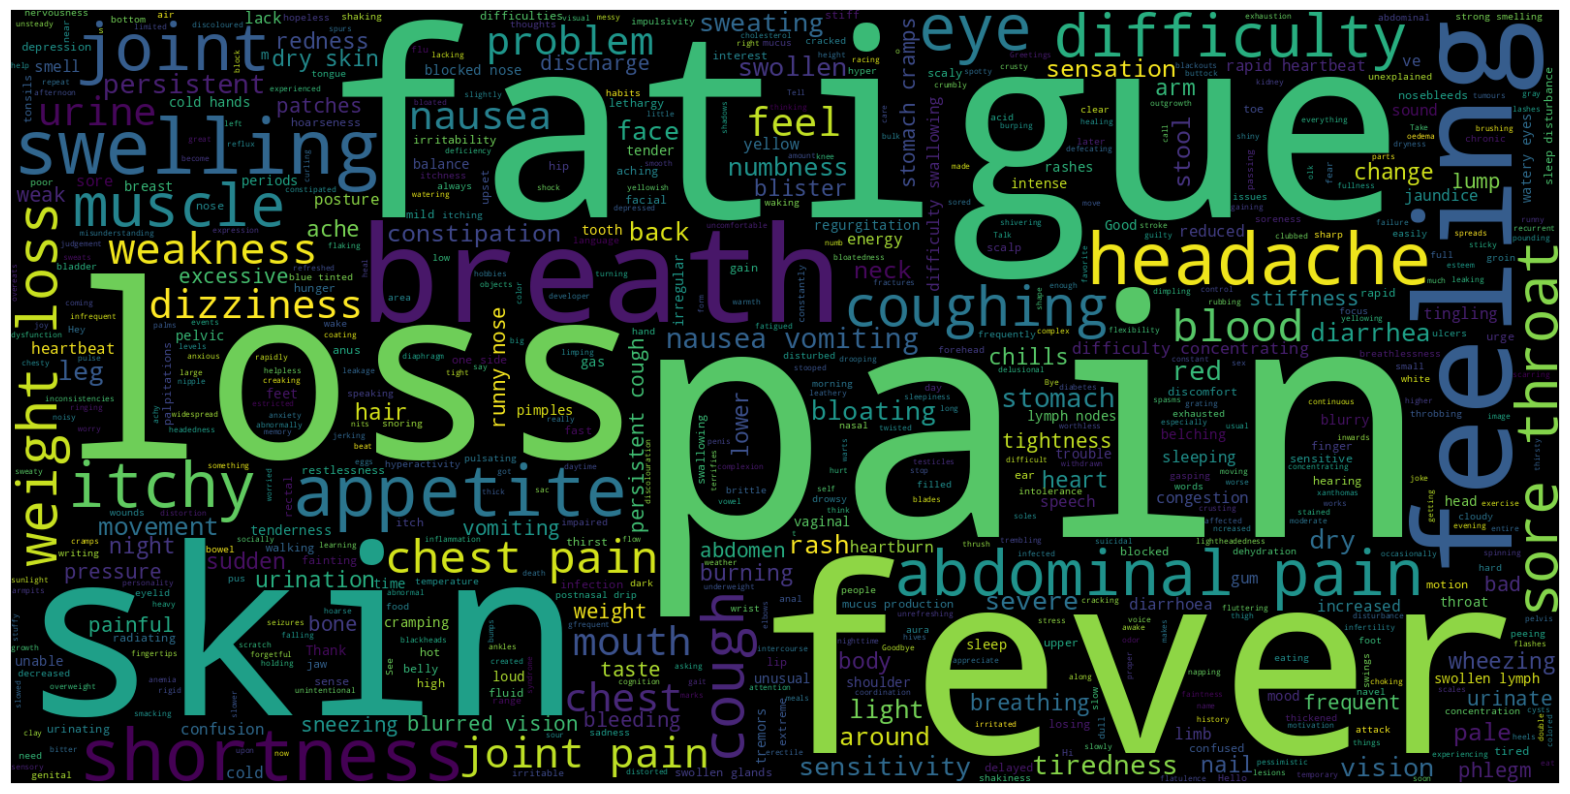

In [14]:
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(df['Pattern']))
plt.imshow(wc, interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.show()

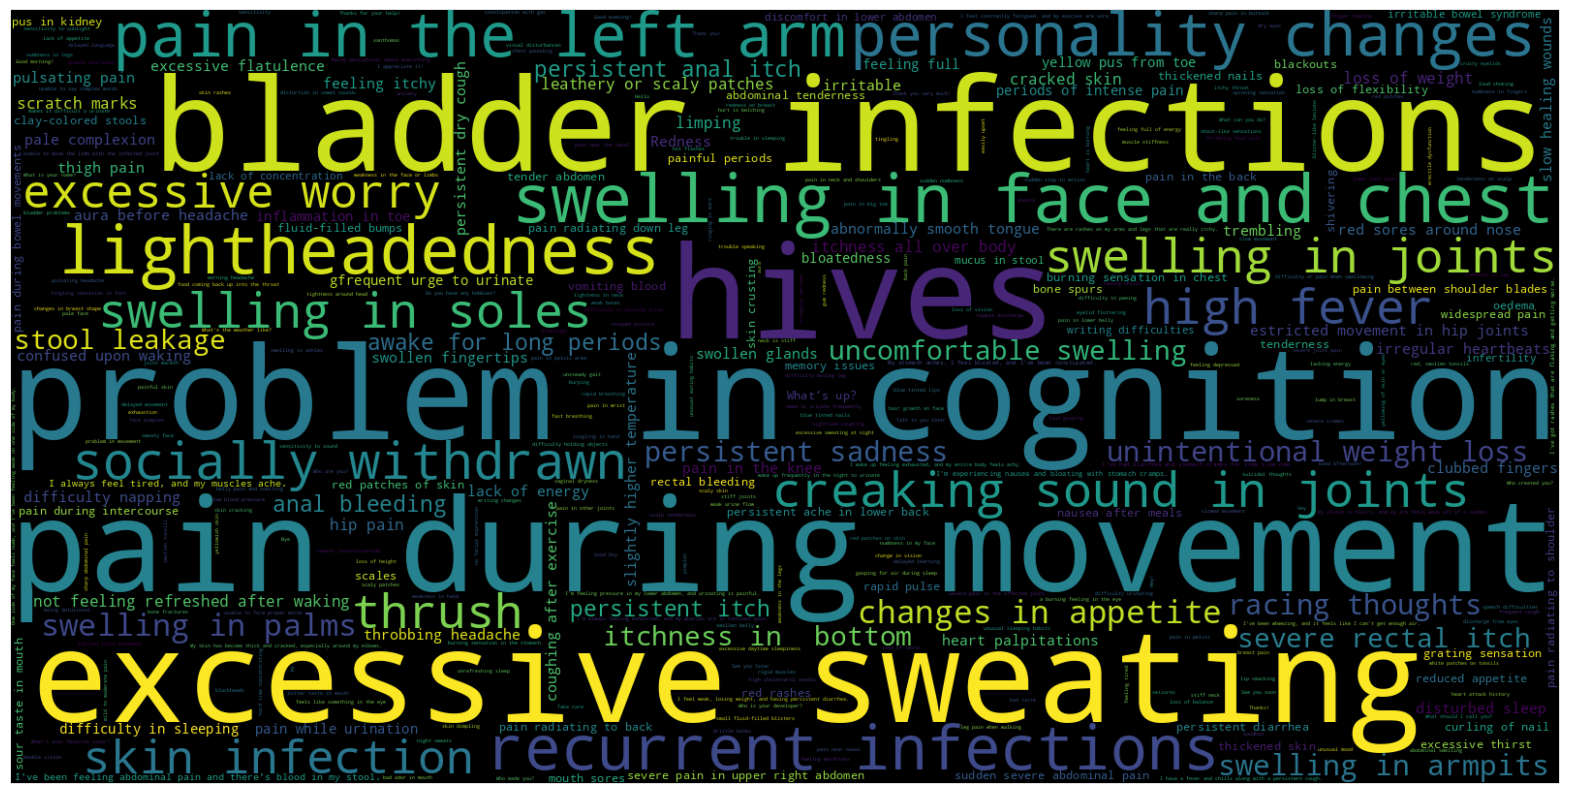

In [16]:
word_counts = dict(df['Pattern'].value_counts())
inverse_freq = {word: 1 / count for word, count in word_counts.items()}

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate_from_frequencies(inverse_freq)
plt.imshow(wc, interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.show()

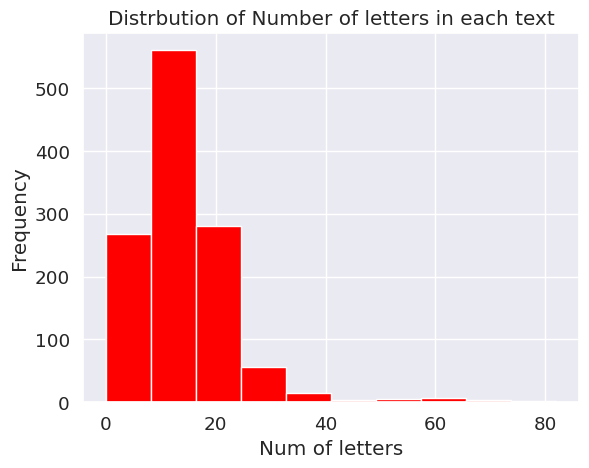

In [ ]:
letters_len=df['Pattern'].str.len()

plt.hist(letters_len,color='red')
plt.title("Distrbution of Number of letters in each text")
plt.xlabel("Num of letters")
plt.ylabel("Frequency")
plt.show()

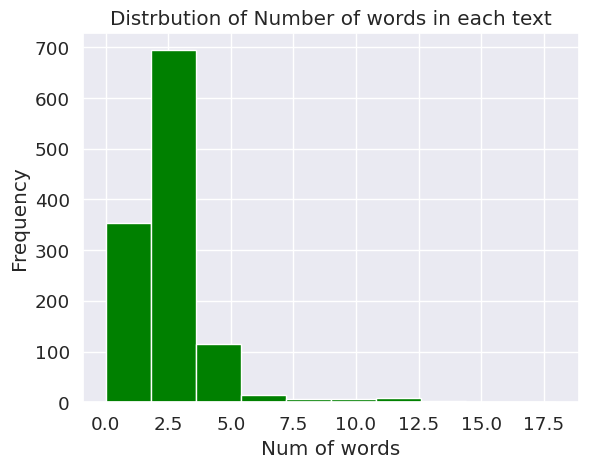

In [ ]:
words_len=df['Pattern'].str.split().map(lambda x: len(x))

plt.hist(words_len,color='green')
plt.title("Distrbution of Number of words in each text")
plt.xlabel("Num of words")
plt.ylabel("Frequency")
plt.show()

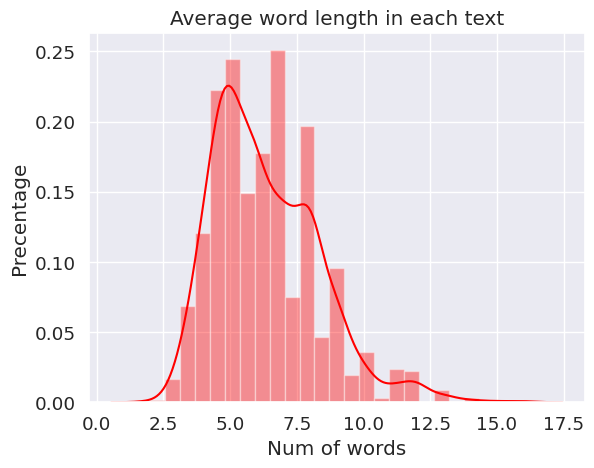

In [ ]:
word=df['Pattern'].str.split().apply(lambda x : [len(i) for i in x])
word = word.map(lambda x: np.mean(x))

sns.distplot(word,color='red')
plt.title("Average word length in each text")
plt.xlabel("Num of words")
plt.ylabel("Precentage")
plt.show()

# Performing Synonym Replacement


In [ ]:
def synonym_replacement(tokens, limit):

    augmented_sentences = []

    for i in range(len(tokens)):
        synonyms = []
        for syn in wordnet.synsets(tokens[i]):
            for lemma in syn.lemmas():
                synonyms.append(lemma.name())
        if len(synonyms) > 0:
            num_augmentations = min(limit, len(synonyms))
            sampled_synonyms = random.sample(synonyms, num_augmentations)
            for synonym in sampled_synonyms:
                augmented_tokens = tokens[:i] + [synonym] + tokens[i+1:]
                augmented_sentences.append(' '.join(augmented_tokens))

    return augmented_sentences

# Downloading NLTK Package

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Processing Data and Synonym Augmentation for Intent Classification

In [ ]:
text_data = []
labels = []
stopwords = set(nltk.corpus.stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

limit_per_tag = 40

for intent in intents['intents']:
    augmented_sentences_per_tag = 0
    for example in intent['patterns']:
        tokens = nltk.word_tokenize(example.lower())
        filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords and token.isalpha()]
        if filtered_tokens:
            text_data.append(' '.join(filtered_tokens))
            labels.append(intent['tag'])
            augmented_sentences = synonym_replacement(filtered_tokens, limit_per_tag - augmented_sentences_per_tag)
            for augmented_sentence in augmented_sentences:
                text_data.append(augmented_sentence)
                labels.append(intent['tag'])
                augmented_sentences_per_tag += 1
                if augmented_sentences_per_tag >= limit_per_tag:
                    break

print(len(text_data))
print(len(labels))

8990
8990


# Vectorizing Text Data

In [ ]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(text_data)
y = labels

# Preparing the Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

name = 'Random Forest'

grid = GridSearchCV(RandomForestClassifier(),
                    {'n_estimators': [100, 200, 300],
                      'max_depth': [10, 20, None],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4]}, cv=3, n_jobs=-1)

grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
score = accuracy_score(y_test, y_pred)

print(f'{name}: {score:.4f} (best parameters: {grid.best_params_})')

Random Forest: 0.5934 (best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300})


# Training the Model to the Full Training Data

In [ ]:
grid.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

# Evaluating the Final Model

In [ ]:
y_pred = grid.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 74.14%


# Testing Responses

In [ ]:
def chatbot_response(user_input):
    input_text = vectorizer.transform([user_input])
    predicted_intent = grid.predict(input_text)[0]

    for intent in intents['intents']:
        if intent['tag'] == predicted_intent:
            response = random.choice(intent['responses'])
            break

    return response

In [ ]:
print('Hello! I am a chatbot. How can I help you today? Type "quit" to exit.')
while True:
    user_input = input('> ')
    if user_input.lower() == 'quit':
        break
    response = chatbot_response(user_input)
    print(response)

Hello! I am a chatbot. How can I help you today? Type "quit" to exit.
> hello
What Can I do for you?
> how are you
What Can I do for you?
> who are you
What Can I do for you?
> what is your name
You can call me Chati Health. I'm a Chatbot.
> who made you
I was developed by ChatBot Team in DEPI Microsoft ML Engineer Track.
> how is the weather outside
Hello! How can I assist you today?
> i have a pain in my back
These symptoms indicate pancreatitis. A healthcare provider can provide guidance on managing this condition.
> i am sneezing and coughing
You have Asthma
> thank you
No problem! Glad to assist you!
> thanks!
Anytime! Let me know if you need anything else.
> good bye
Have a great day! I'm here whenever you need help.
> quit


# Saving the Model, Vectorizer and Dataset

In [ ]:
import os
import pickle

if not os.path.exists('model'):
    os.makedirs('model')

if not os.path.exists('dataset'):
    os.makedirs('dataset')

with open('model/chatbot_model.pkl', 'wb') as f:
    pickle.dump(grid, f)
print("Model saved to chatbot_model.pkl")
print("--------------------------------")

with open('model/vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
print("Vectorizer saved to vectorizer.pkl")
print("--------------------------------")

with open('dataset/intents.json', 'w') as f:
    json.dump(intents, f)
print("Dataset saved to intents.json")
print("--------------------------------")

Model saved to chatbot_model.pkl
--------------------------------
Vectorizer saved to vectorizer.pkl
--------------------------------
Dataset saved to intents.json
--------------------------------
